## Prepare dataset

In [1]:
import pandas as pd
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read in track metadata with genre labels
tracks = tracks = pd.read_csv('/CSV/Project/Classify_Song_Genres/fma-rock-vs-hiphop.csv')

# Read in track metrics with the features
echonest_metrics = pd.read_json('/CSV/Project/Classify_Song_Genres/echonest-metrics.json',precise_float = True)

# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = pd.merge(echonest_metrics,tracks[['track_id','genre_top']],on='track_id')

echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
track_id            4802 non-null int64
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
genre_top           4802 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [3]:
print(echo_tracks.head())

   track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2       341      0.977282      0.468808  0.134975          0.687700  0.105381   
3     46204      0.953349      0.498525  0.552503          0.924391  0.684914   
4     46205      0.613229      0.500320  0.487992          0.936811  0.637750   

   speechiness    tempo   valence genre_top  
0     0.159310  165.922  0.576661   Hip-Hop  
1     0.461818  126.957  0.269240   Hip-Hop  
2     0.073124  119.646  0.430707      Rock  
3     0.028885   78.958  0.430448      Rock  
4     0.030327  112.667  0.824749      Rock  


In [4]:
# Create a correlation matrix
corr_metrics = echo_tracks.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1,-0.372282,0.0494541,0.140703,-0.275623,0.0482307,-0.0269951,-0.0253918,0.0100698
acousticness,-0.372282,1,-0.0289537,-0.281619,0.19478,-0.0199914,0.072204,-0.0263097,-0.0138406
danceability,0.0494541,-0.0289537,1,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1,0.0282377,0.113331,-0.109983,0.195227,0.0386027
instrumentalness,-0.275623,0.19478,-0.255217,0.0282377,1,-0.0910218,-0.366762,0.022215,-0.219967
liveness,0.0482307,-0.0199914,-0.106584,0.113331,-0.0910218,1,0.0411725,0.00273169,-0.0450931
speechiness,-0.0269951,0.072204,0.276206,-0.109983,-0.366762,0.0411725,1,0.00824055,0.149894
tempo,-0.0253918,-0.0263097,-0.242089,0.195227,0.022215,0.00273169,0.00824055,1,0.0522212
valence,0.0100698,-0.0138406,0.473165,0.0386027,-0.219967,-0.0450931,0.149894,0.0522212,1


## Normalizing the feature data

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = echo_tracks.drop(['genre_top','track_id'],axis=1)
labels = echo_tracks['genre_top']

#Scale the features and set the values to a new variable
scaled_features = scaler.fit_transform(features)

## Principal Componet Analysis on the scaled data

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 8 artists>

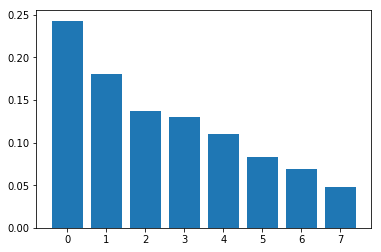

In [7]:
import matplotlib.pyplot as plt

# plot the explained variance using a barplot

plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)

## Further visualization of PCA 

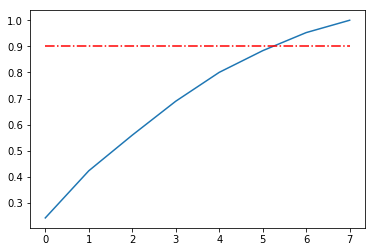

In [8]:
import numpy as np

plt.plot(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_))

plt.plot([0,7],[0.9,0.9],color='red',linestyle='-.')

# 90% variance explained by 6 features
n_components = 6

# Train a decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
tree = DecisionTreeClassifier()

pca = PCA(n_components=6)

preject_features = pca.fit_transform(scaled_features)

# Split train and test data
X_train,X_test,y_train,y_test = train_test_split(preject_features,labels,random_state=10)

# Fit the model
tree.fit(X_train,y_train)
tree_y_predict = tree.predict(X_test)

# Evaluate the performance
print(classification_report(y_test,tree_y_predict))

              precision    recall  f1-score   support

     Hip-Hop       0.66      0.67      0.66       229
        Rock       0.92      0.92      0.92       972

   micro avg       0.87      0.87      0.87      1201
   macro avg       0.79      0.79      0.79      1201
weighted avg       0.87      0.87      0.87      1201



## Design a logistic regression model

In [15]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

# Split train and test data
X_train,X_test,y_train,y_test = train_test_split(preject_features,labels,random_state=10)


# Fit the model
reg.fit(X_train,y_train)
reg_y_predict = reg.predict(X_test)

# Evaluate the performance
print(classification_report(y_test,reg_y_predict))

              precision    recall  f1-score   support

     Hip-Hop       0.75      0.57      0.65       229
        Rock       0.90      0.95      0.93       972

   micro avg       0.88      0.88      0.88      1201
   macro avg       0.83      0.76      0.79      1201
weighted avg       0.87      0.88      0.87      1201



## Using cross-validation to evaluate our models

In [24]:
from sklearn.model_selection import cross_val_score

tree_score = np.mean(cross_val_score(tree,preject_features,labels,cv=5))
reg_score = np.mean(cross_val_score(reg,preject_features,labels,cv=5))

print('tree:'+str(tree_score)+'  '+'reg_score:'+str(reg_score))

tree:0.8479849549080818  reg_score:0.8713096167186958
